In [35]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import mlab
from scipy import stats as stat


In [36]:
training_data = pd.read_csv("./work/kaggle/kaggle_titanic/data/train.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [38]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# gets missed data
total = training_data.isnull().sum().sort_values(ascending=False)
percentage = round(training_data.isnull().sum()/training_data.isnull().count()*100, 1).sort_values(ascending=False)
missing = pd.concat([total, percentage], axis=1, keys=['total', '%'])
missing

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [40]:
# working with Cabin column, 1st letter is for Titanic deck (which could be important)
def parse_deck(cabin):
    if cabin is not None:
        cabin_str = str(cabin)
        if cabin_str != 'nan':
            return cabin_str[0]
        else:
            # print(cabin)
            return 'NaN'
    else:
        return "NaN"
    
    
deck_array = training_data['Cabin'].apply(parse_deck).sort_values().unique()

decks = pd.DataFrame(deck_array, columns=["Deck"])
# decks.set_index('Deck').T
# deck_array
test = pd.DataFrame([], columns=deck_array)
test
test.append({'A': True}, ignore_index=True)

,A,B,C,D,E,F,G,NaN,T
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
def generate_decks_data(row, empty_df):
    deck = parse_deck(row['Cabin'])
    return empty_df.append({deck: 1, 'PassengerId': row['PassengerId']}, ignore_index=True).iloc[0]
    # return  deck


d = training_data.apply(generate_decks_data, axis=1, args=(test,)).fillna(0)
d.head(10)

,A,B,C,D,E,F,G,NaN,T,PassengerId
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0


In [43]:

train_df = pd.merge(training_data, d, how='left', on='PassengerId')
train_df.query('T>0').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,A,B,C,D,E,F,G,NaN,T
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,...,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
def prefix_name_parser(name):
    return name[name.rfind(',')+1:name.rfind('.')].strip()


prefix_name_data = training_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['NamePrefix'] = prefix_name_data
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['NamePrefix'] = train_df['NamePrefix'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['NamePrefix'] = train_df['NamePrefix'].replace('Mlle', 'Miss')
train_df['NamePrefix'] = train_df['NamePrefix'].replace('Ms', 'Miss')
train_df['NamePrefix'] = train_df['NamePrefix'].replace('Mme', 'Mrs')
train_df['NamePrefix'] = train_df['NamePrefix'].map(titles)
train_df['NamePrefix'].fillna(0)    
prefix_name_data.value_counts()

# train_df = train_df.drop(['Name'], axis=1)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Mme           1
Lady          1
Don           1
Countess      1
Ms            1
Capt          1
Sir           1
Name: Name, dtype: int64

In [45]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,A,B,C,D,E,F,G,NaN,T,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [46]:
# map sex
gender_map = {'male': 1, 'female': 0}
train_df['Sex'] = train_df['Sex'].map(gender_map)

train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,A,B,C,D,E,F,G,NaN,T,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [47]:
training_data[training_data['Cabin'].isna()].size
# as an idea: you can use cabine number as well in order to detect places where people can survive
# moreover we can provde cabins for persons that doesn't have cabine - just simulate 


8244

In [48]:
# working with Age column (+ sex)
males_filter = training_data['Sex'] == 'male'
females_filter = training_data['Sex'] == 'female'
notnan_age = training_data['Age'].notna()

# get ages differentiated by sex
males_age = training_data.loc[males_filter & notnan_age, 'Age']
females_age = training_data.loc[females_filter & notnan_age, 'Age']

# get statistic for male and female
male_age_mean = np.mean(males_age)
male_age_std = np.std(males_age)
females_age_mean = np.mean(females_age)
female_age_std = np.std(females_age)

# min max values for age
min_age = pd.concat([males_age, females_age]).min()
max_age = pd.concat([males_age, females_age]).max()

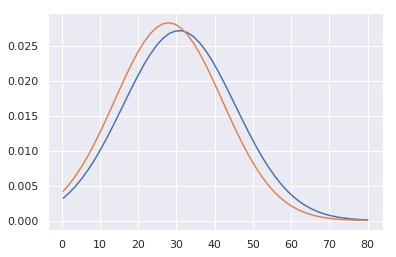

In [49]:
x_axis_vals = np.linspace(start=min_age, stop=max_age)
sns.set()
plt.plot(x_axis_vals, stat.norm.pdf(x_axis_vals, male_age_mean, male_age_std))
plt.plot(x_axis_vals, stat.norm.pdf(x_axis_vals, females_age_mean, female_age_std))


In [50]:
# todo: randomly generate age for male and female based on distribution. Fill empty ages in dataset
na_ages_m = train_df[(train_df['Sex'] == gender_map['male']) & (train_df['Age'].isna())].size
na_ages_f = train_df[(train_df['Sex'] == gender_map['female']) & (train_df['Age'].isna())].size

men_ages = np.random.normal(male_age_mean, male_age_std, train_df[(train_df['Sex'] == gender_map['male']) 
                                                                  & (train_df['Age'].isna())].size)

women_ages = np.random.normal(females_age_mean, female_age_std, train_df[(train_df['Sex'] == gender_map['female']) 
                                                                         & (train_df['Age'].isna())].size)



In [51]:
null_age = train_df[train_df['Sex'] == 0]

assert train_df[train_df['Sex'] == 0].size + train_df[train_df['Sex'] == 1].size == train_df.size

assert train_df[train_df['Age'].isna()].size == train_df[(train_df['Sex'] == 0) & (train_df['Age'].isna())].size + \
       train_df[(train_df['Sex'] == 1) & (train_df['Age'].isna())].size


train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
A              891 non-null float64
B              891 non-null float64
C              891 non-null float64
D              891 non-null float64
E              891 non-null float64
F              891 non-null float64
G              891 non-null float64
NaN            891 non-null float64
T              891 non-null float64
NamePrefix     891 non-null int64
dtypes: float64(11), int64(7), object(4)
memory usage: 160.1+ KB


In [52]:
def map_age(row, map_box):
    row['Age'] = map_box.pop()  
    return row


mList = men_ages.tolist()
wList = women_ages.tolist()
tm = train_df[(train_df['Sex'] == gender_map['male']) & (train_df['Age'].isna())].apply(map_age, axis=1, args=[mList,])
tw = train_df[(train_df['Sex'] == gender_map['female']) & (train_df['Age'].isna())].apply(map_age, axis=1, args=[wList,])

train_df[(train_df['Sex'] == gender_map['male']) & (train_df['Age'].isna())] = tm
train_df[(train_df['Sex'] == gender_map['female']) & (train_df['Age'].isna())] = tw
# train_df[train_df['Sex'] == gender_map['male']].head()
# train_df[(train_df['Sex'] == gender_map['male']) & (train_df['Age'].isna())].head()

list(train_df)
# train_df.drop(columns=['Name']).head(20)
#tt.head(10)
# train_df.where((train_df['Sex'] == gender_map['male']) & (train_df['Age'].isna()), mList.pop())
# train_df[(train_df['Sex'] == gender_map['female']) & (train_df['Age'].isna())].size


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'NaN',
 'T',
 'NamePrefix']

In [53]:
# gets missed data
total = train_df.isnull().sum().sort_values(ascending=False)
percentage = round(train_df.isnull().sum()/train_df.isnull().count()*100, 1).sort_values(ascending=False)
missing = pd.concat([total, percentage], axis=1, keys=['total', '%'])
missing

,total,%
Cabin,687,77.1
Embarked,2,0.2
Fare,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [54]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
train_df[train_df['Embarked'].isna()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,A,B,C,D,E,F,G,NaN,T,NamePrefix


In [59]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:

train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [60]:
# training_data[training_data['Cabin'].isna()].size
embarkingMap = {'S': 0, 'C': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarkingMap)


In [61]:
total = training_data.isnull().sum().sort_values(ascending=False)
percent_1 = training_data.isnull().sum()/training_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [62]:
train_df
train_df[train_df['Embarked'].isna()].head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,A,B,C,D,E,F,G,NaN,T,NamePrefix


In [64]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
T,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
